## Задание №2.1 Интерполирование: Полиномы Лагранжа и Ньютона
С помощью программной реализации построения интерполяционных полиномов в форме Лагранжа и Ньютона проинтерполировать функцию:
$$f(x)=x-\sin{x}-0.25$$
по n равноотстоящим узлам или по n оптимальным узлам на интервале $[a,b]$.

1. Зададим приближаемую функцию:

In [40]:
import numpy as np
def f(x):
    return x-np.sin(x)-0.25

2. Зададим функции построения массивов равноотстоящих и оптимальных узлов:

In [41]:
def create_x(n,a,b): ## равноотстоящие
    x = list()
    for i in range(n+1):
        x.append(a+(b-a)*i/n)
    return x

def create_optx(n,a,b): ## оптимальные узлы 
    x = list()
    for i in range(n+1):
        k = 1/2*((b-a)*np.cos((2*i+1)/(2*(n+1))*np.pi+b+a))
        
        ##случай очень маленьких значений оптимальных точек
        if abs(k)<10**(-12):
            x.append(0)
        else:
            x.append(1/2*((b-a)*np.cos((2*i+1)/(2*(n+1))*np.pi+b+a)))
    return x

Общая функция для вывода результатов:

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

def results(info, build_fun):
    n = [3,5,10,25,50]
    a,b = -5,5
    Rmax=n.copy()
    ##создание таблицы для результатов
    f_dict = {
        'Количество узлов(n)': [0,0,0,0,0]    ,
        'Количество проверочных точек (m)': [0,0,0,0,0] ,
        'Максимальное отклонение (R%s)'%info[0]: [0,0,0,0,0],
        'Максимальное отклонение (R%s)'%info[1]:[0,0,0,0,0]
    }
    f_df = pd.DataFrame(f_dict)
    for i in n:
        x = create_x(i,a,b)
        xopt = create_optx(i,a,b)
        xopt = xopt[::-1]
        F = build_fun(x,f)
        Fopt = build_fun(xopt,f)
        m = i*50
        y = list()
        yopt = list()
        x = create_x(m,a,b)
        for j in range(m+1):
            y.append(F(x[j]))
            yopt.append(Fopt(x[j]))
        fm = f(x)
        RFn = list()
        RFnopt = list()
    
        ##подсчет отклонений
        for j in range(m+1):
            RFn.append(abs(fm[j]-y[j]))
            RFnopt.append(abs(fm[j]-yopt[j]))
            
        ##занесение информации в таблицу и построение графиков
        R1=max(RFn)
        R2=max(RFnopt)
        f_df.iloc[n.index(i)] = [i,m,R1,R2]
        sns.set_style("whitegrid")
        plt.figure(figsize=(12, 6))
        plt.title('График для f(x), $%s$ и $%s$ при n = %s' %(info[2],info[3],str(i)))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(x,fm)
        plt.plot(x,y)
        plt.plot(x,yopt)
        plt.legend(['f(x)',info[2]+str(i),info[3]+str(i)])
        Rmax[n.index(i)] = [RFn,RFnopt]
    ##Вывод таблицы и максимальных отклонений
    return f_df, Rmax

3. Функция построения полинома Лагранжа:

In [43]:
def build_Ln(x,f):
    n = len(x)
    
    ##функция подсчета  выражения в числителе в множителе Лагранжа
    def w_1(t):
        ans=1
        for i in range (n):
            ans*= t-x[i]
        return ans
    
    ##выражения в знаменателе в множителе Лагранжа
    w_2 = []
    for i in range(n):
        d = 1
        for j in range (n):
            if i == j:
                continue
            else:
                d*= (x[i]-x[j])
        w_2.append(0)
        w_2[i] = d

    ## сам сформированный полином Лагранжа
    def Ln(t):
        ans = 0
        w1 = w_1(t)
        for i in range(n):
            if t==x[i]:
                ans+= f(x[i])
            else:
                ans+= w1*f(x[i])/((t-x[i])*w_2[i])
        return ans
    
    ##Возвращаем полином Лагранжа
    return Ln

Возьмем отрезок [-5,5] и построим соответсвующие полиномы Лагранжа:

,Количество узлов(n),Количество проверочных точек (m),Максимальное отклонение (RLn),Максимальное отклонение (RLnopt)
0,3,150,1.308185e+00,8.742866e-01
1,5,250,4.269000e-01,1.927693e-01
2,10,500,6.298301e-03,7.617035e-04
3,25,1250,1.189360e-11,5.329071e-15
4,50,2500,2.542702e-04,1.154632e-14


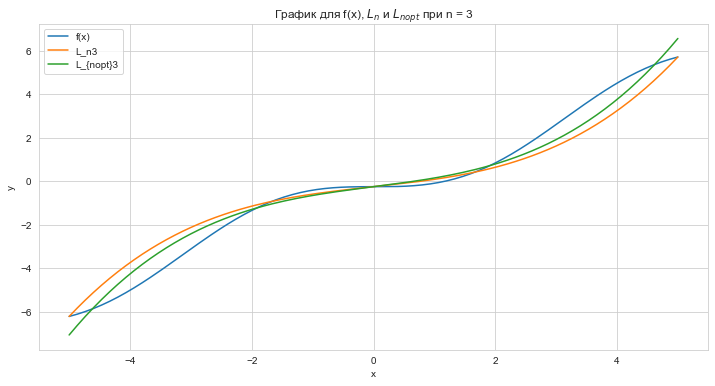

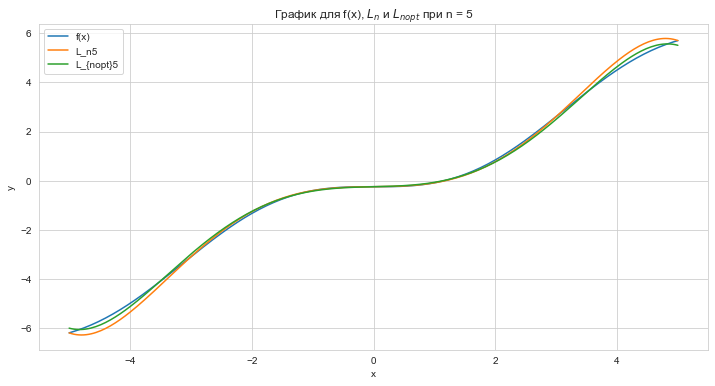

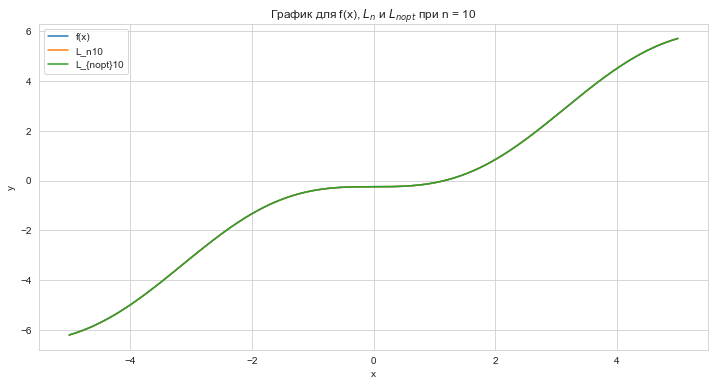

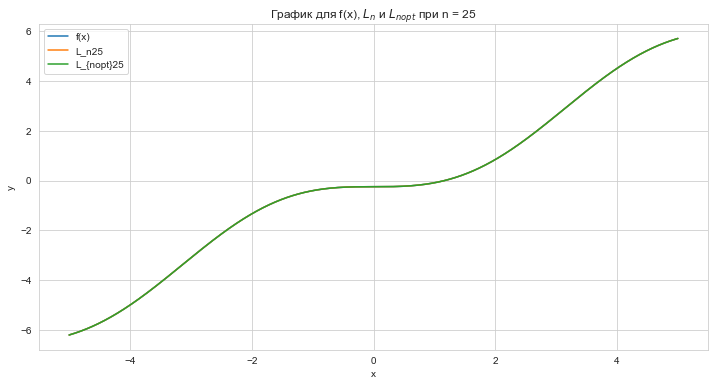

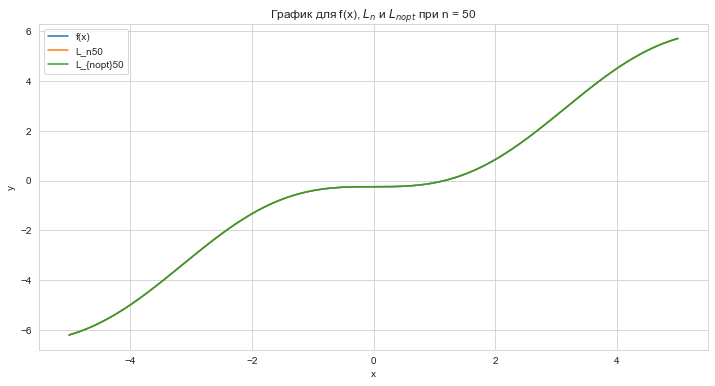

In [44]:
L_info = ['Ln','Lnopt','L_n','L_{nopt}']
L_df,RL = results(L_info, build_Ln)
L_df

5. Функция построения полинома Ньютона:

In [45]:
def build_Nn(x,f):
    n = len(x)
    
    #построение разделенных разностей
    fans = list()
    fdd = f(x)
    for i in range(n-1,-1,-1):
        for j in range(i):
            fdd[j] = (fdd[j+1]-fdd[j])/(x[j+n-i]-x[j])
        fans.append(fdd[0])
    
    #функция полинома Ньютона
    def Nn(t):
        ans = f(x[0])
        xterm = 1
        for i in range(n-1):
            xterm*= (t-x[i])
            ans+= fans[i]*xterm
        return ans
    
    ##возвращаем функцию полинома Ньютона
    return Nn

На том же отрезке [-5,5] построим полиномы Ньютона:

,Количество узлов(n),Количество проверочных точек (m),Максимальное отклонение (RNn),Максимальное отклонение (RNnopt)
0,3,150,1.308185e+00,8.742866e-01
1,5,250,4.269000e-01,1.927693e-01
2,10,500,6.298301e-03,7.617035e-04
3,25,1250,8.641976e-13,3.490541e-13
4,50,2500,5.238124e-06,1.851275e-08


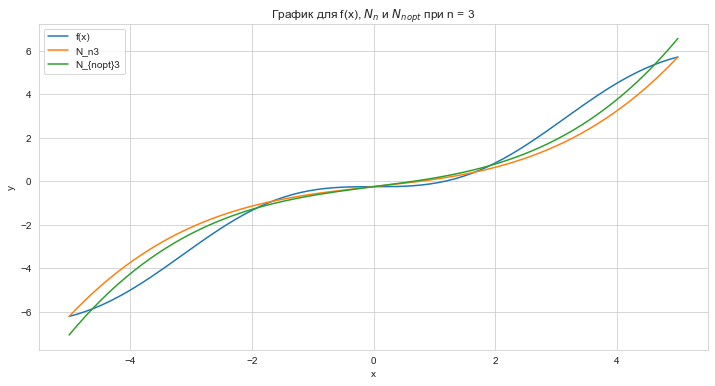

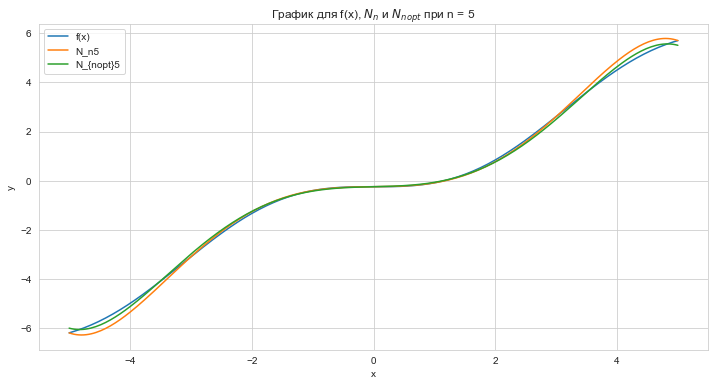

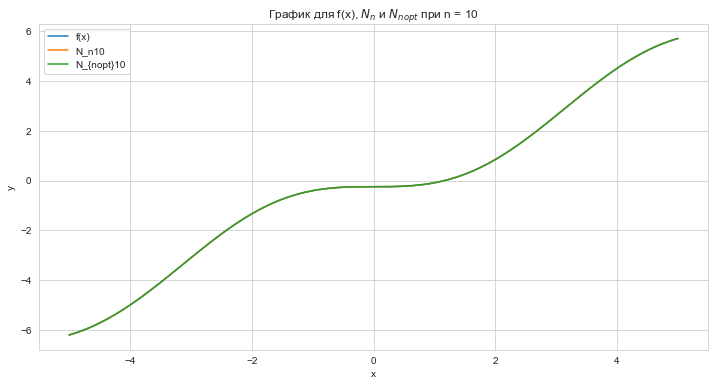

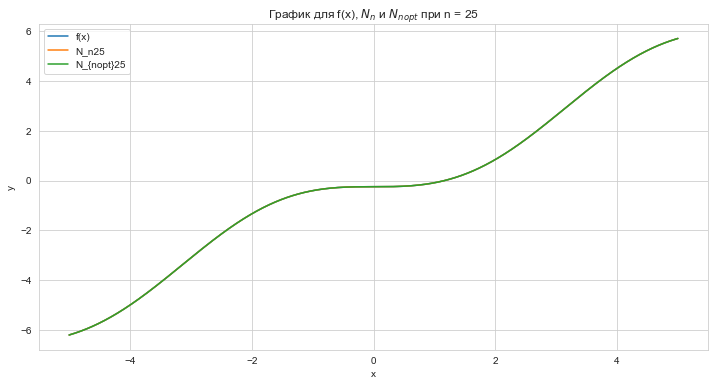

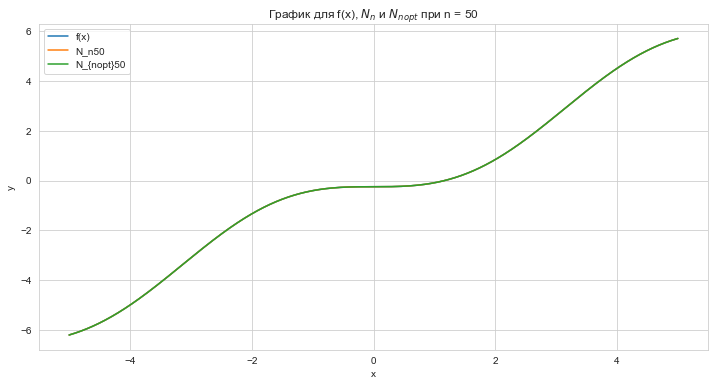

In [46]:
N_info = ['Nn','Nnopt','N_n','N_{nopt}']
N_df,RN = results(N_info, build_Nn)
N_df

## Задание 2.2. Интерполирование. Сплайны

С помощью программной реализации построения интерполяционных сплайнов $S_{1,0}(x)$, $S_{2,1}(x) $,$S_{3,2}(x)$ проинтерполировать функцию:
$$f(x)=x-\sin{x}-0.25$$
по n равноотстоящим узлам или по n оптимальным узлам на интервале $[a,b]$.

In [47]:
from Gauss import mGauss as gs ##импортируем метод Гаусса

Функция построения сплайна $S_{1,0}:$

In [48]:
def splain_1_0(x,f):
    a = []
    
    ##строим матрицы 2х2 и для каждой из них считаем значения коэффициентов по методу Гаусса###
    b = [[0,1],[0,1]]
    c = [0,0]
    d = [0][0]
    for i in range(len(x)-1):
        b[0][0] = x[i]
        b[1][0] = x[i+1]
        b[0][1] = 1
        b[1][1] = 1
        c[0] = f(x[i])
        c[1] = f(x[i+1])
        d = gs(len(c),b,c)
        a.append([d[0],d[1]])
        
    ##сама функция сплайна
    def S_1_0(t):    
        for i in range(len(a)):
            if x[i] <= t and t < x[i+1]:
                return a[i][0]*t + a[i][1]
            if t >= x[len(a)-1]:
                return a[len(a)-1][0]*t + a[len(a)-1][1]
            if t < x[0]:
                return a[0][0]*t + a[0][1]
    ##возвращаем функцию сплайна
    return S_1_0

Сплайны $S_{1,0}$ на отрезке [-5,5]:

,Количество узлов(n),Количество проверочных точек (m),Максимальное отклонение (RS10n),Максимальное отклонение (RS10nopt)
0,3,150,0.386954,0.350530
1,5,250,0.420336,0.390453
2,10,500,0.122111,0.179499
3,25,1250,0.019925,0.039682
4,50,2500,0.004995,0.010722


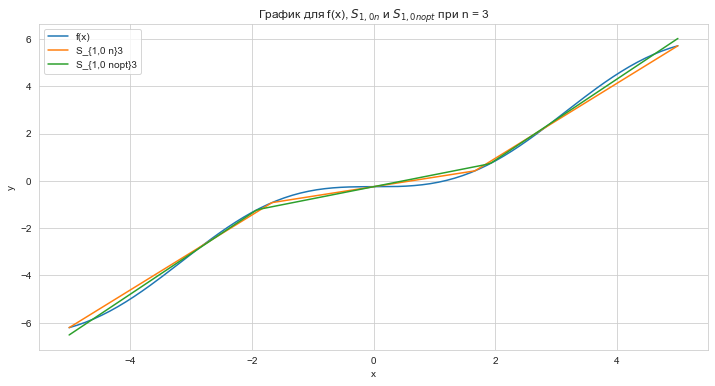

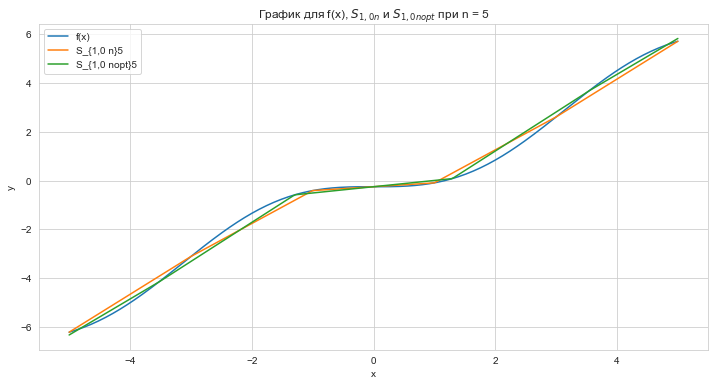

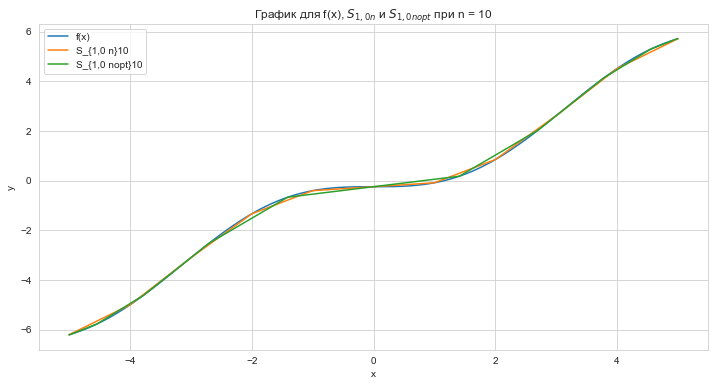

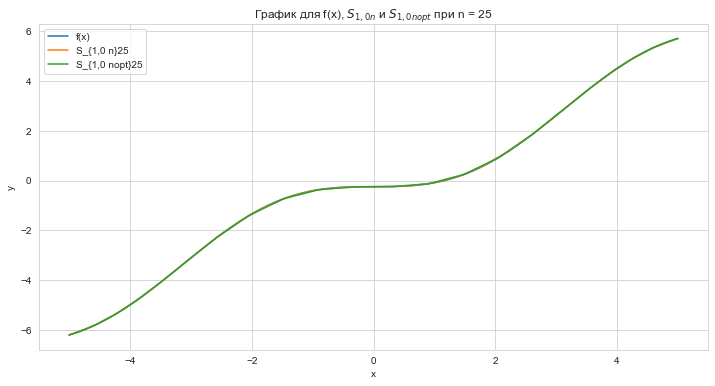

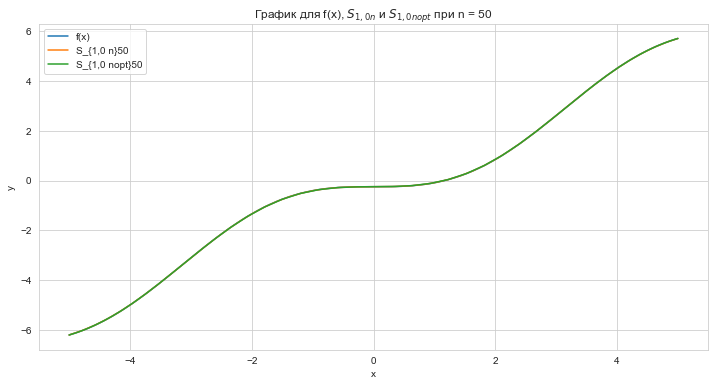

In [49]:
S10_info=['S10n','S10nopt','S_{1,0 n}','S_{1,0 nopt}']
S10_df,RS=results(S10_info, splain_1_0)
S10_df

Функция построения сплайна $S_{2,1}:$

In [50]:
def splain_2_1(x,f):
    a = []
    b = []
    z = []
    
    ##строим матрицу и вектор y
    for i in range(3*(len(x)-1)):
        z.append(0)
    for i in range(3*(len(x)-1)):
        a.append(z.copy())
    for i in range((len(x)-1)):
        a[2*i][3*i] = x[i]**2
        a[2*i][3*i+1] = x[i]
        a[2*i][3*i+2] = 1
        a[2*i+1][3*i] = x[i+1]**2
        a[2*i+1][3*i+1] = x[i+1]
        a[2*i+1][3*i+2] = 1
        b.append(f(x[i]))
        b.append(f(x[i+1]))
    for i in range ((len(x)-2)):
        a[2*len(x)-2+i][3*i] = 2*x[i+1]
        a[2*len(x)-2+i][3*i+1] = 1
        a[2*len(x)-2+i][3*i+2] = 0
        a[2*len(x)-2+i][3*i+3] = -2*x[i+1]
        a[2*len(x)-2+i][3*i+4] = -1
        b.append(0)
    a[-1][-3] = 2*x[len(x)-1]
    a[-1][-2] = 1
    b.append(0)
    
    ##вычисляем коэффициенты по методу Гаусса
    a = gs(3*(len(x)-1),a,b)
    
    ##сама функция сплайна
    def S_2_1(t):
        k=int(len(a)/3)
        for i in range(k):
            if x[i] <= t and t < x[i+1]:
                return a[3*i]*t**2 + a[3*i+1]*t + a[3*i+2]
            if t >= x[k-1]:
                return a[3*(k-1)]*t**2 + a[3*(k-1)+1]*t + a[3*(k-1)+2]
            if t < x[0]:
                return a[0]*t**2 + a[0+1]*t + a[0+2]
    
    ##возвращаем построенный сплайн в виде функции
    return S_2_1

Сплайны $S_{2,1}$ на отрезке [-5,5]:

,Количество узлов(n),Количество проверочных точек (m),Максимальное отклонение (RS21n),Максимальное отклонение (RS21nopt)
0,3,150,3.532853,2.904576
1,5,250,0.459483,0.396976
2,10,500,0.181034,0.265232
3,25,1250,0.071452,0.109495
4,50,2500,0.035782,0.055284


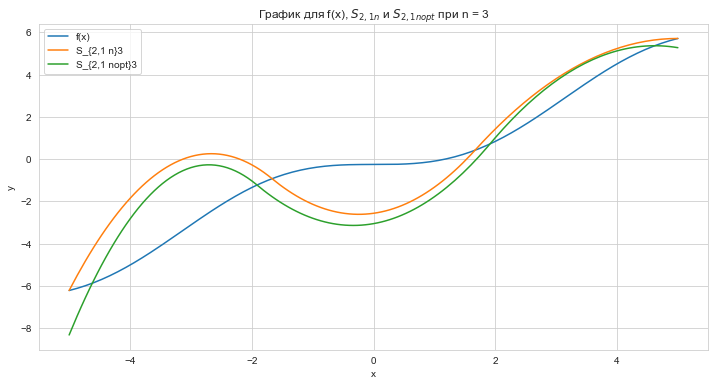

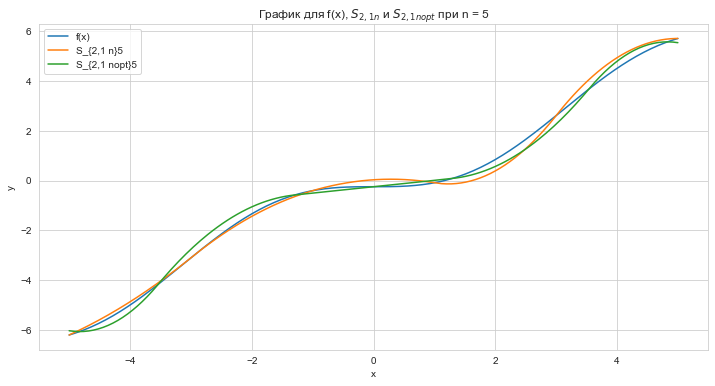

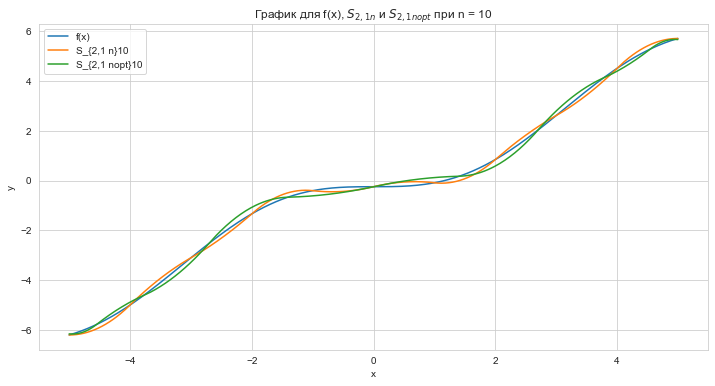

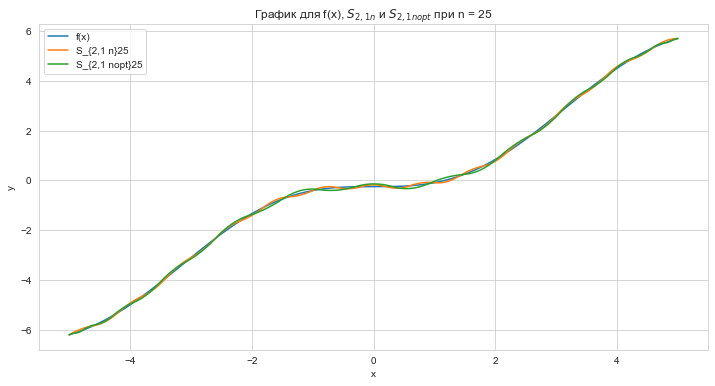

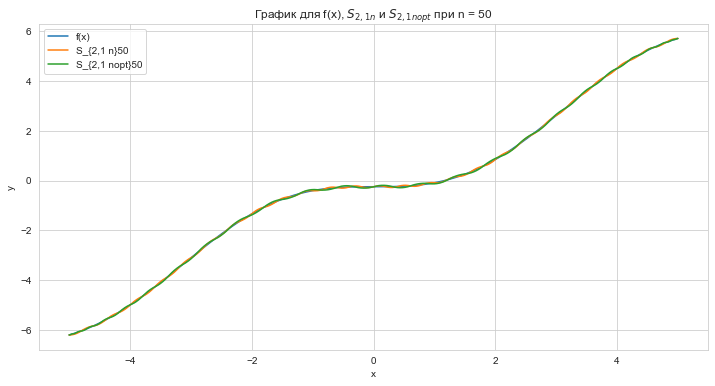

In [51]:
S21_info=['S21n','S21nopt','S_{2,1 n}','S_{2,1 nopt}']
S21_df,RS=results(S21_info, splain_2_1)
S21_df

Функция построения сплайна $S_{3,2}:$

In [52]:
def splain_3_2(x,f):
    h = []
    z = []
    H = []
    y = []
    fx = []
    
    ##строим трехдиагональную матрицу
    for i in range(len(x)):
        fx.append(f(x[i]))
    for i in range(len(x)-1):
        h.append(x[i+1]-x[i])        
    for i in range((len(x)-2)):
        z.append(0)
    for i in range((len(x)-2)):
        H.append(z.copy())
    for i in range(1,len(H[0])):
        H[i][i]=2*(h[i]+h[i+1])
        H[i-1][i]=h[i]
        H[i][i-1]=h[i]
    H[0][0]=2*(h[0]+h[1])
    
    ##строим вектор гамма
    for i in range(1,len(x)-1):
        y.append(6*((fx[i+1]-fx[i])/h[i]-(fx[i]-fx[i-1])/h[i-1]))
        
    ##с помощью метода Гаусса решаем систему, получаем вторые производные
    y2=gs(len(x)-2,H,y)
    y2.insert(0,0)
    y2.insert(-1,0)
    
    ##первые производные
    y1=[]
    for i in range(len(x)-1):
        y1.append((fx[i+1]-fx[i])/h[i]-y2[i+1]*h[i]/6 - y2[i]*h[i]/3)
    
    ##функция сплайна
    def S_3_2(t):
        for i in range(len(x)-1):
            if x[i] <= t and t < x[i+1]:
                return (fx[i]+y1[i]*(t-x[i])+(y2[i]*(t-x[i])**2)/2 +
                        ((y2[i+1]-y2[i])*(t-x[i])**3/(6*h[i])))
            if t>=x[len(x)-1]:
                 return (fx[len(x)-2]+y1[len(x)-2]*(t-x[len(x)-2])+(y2[len(x)-2]*(t-x[len(x)-2])**2)/2 +
                        ((y2[len(x)-1]-y2[len(x)-2])*(t-x[len(x)-2])**3/(6*h[len(x)-2])))
            if t<x[0]:
                return (fx[0]+y1[0]*(t-x[0])+(y2[0]*(t-x[0])**2)/2 +
                        ((y2[1]-y2[0])*(t-x[0])**3/(6*h[0])))
    
    ##возвращаем сплайн в виде функции
    return S_3_2

Сплайны $S_{3,2}$ на отрезке [-5,5]:

,Количество узлов(n),Количество проверочных точек (m),Максимальное отклонение (RS32n),Максимальное отклонение (RS32nopt)
0,3,150,0.858779,0.849206
1,5,250,0.317128,0.130765
2,10,500,0.058069,0.040994
3,25,1250,0.011046,0.001359
4,50,2500,0.002729,0.000091


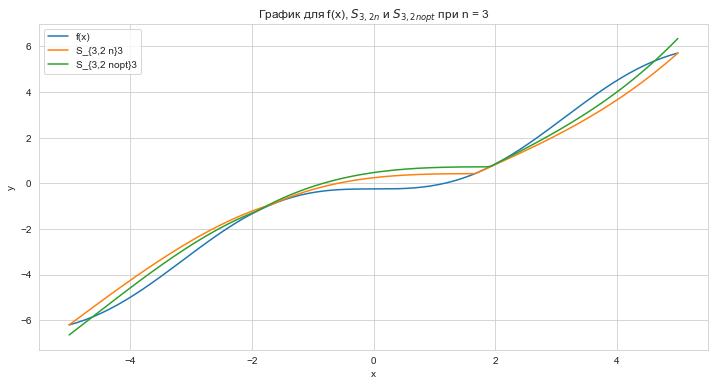

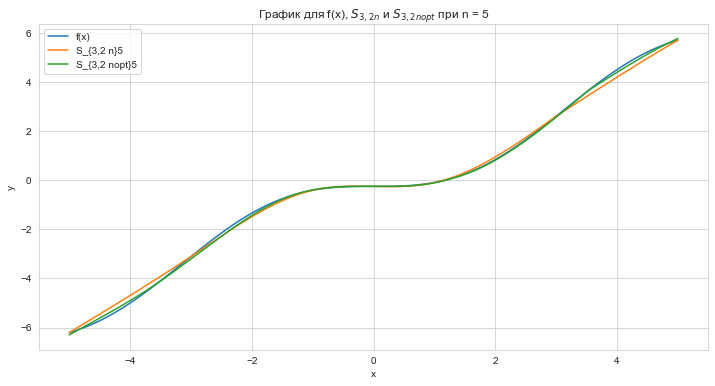

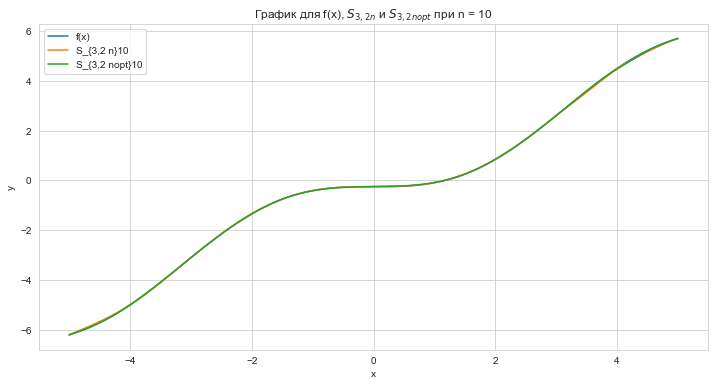

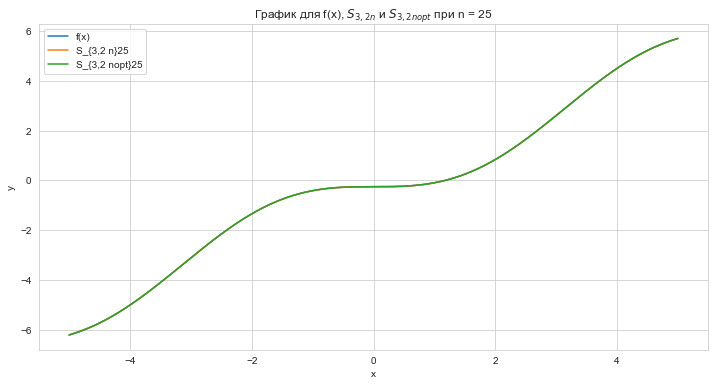

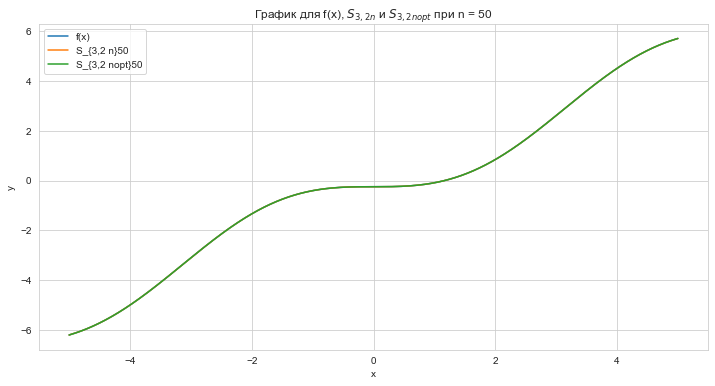

In [53]:
S32_info = ['S32n','S32nopt','S_{3,2 n}','S_{3,2 nopt}']
S32_df,RS = results(S32_info, splain_3_2)
S32_df

Построение графиков распределения абсолютной погрешности кубического сплайна $S_{3,2}$ и полинома Лагранжа:

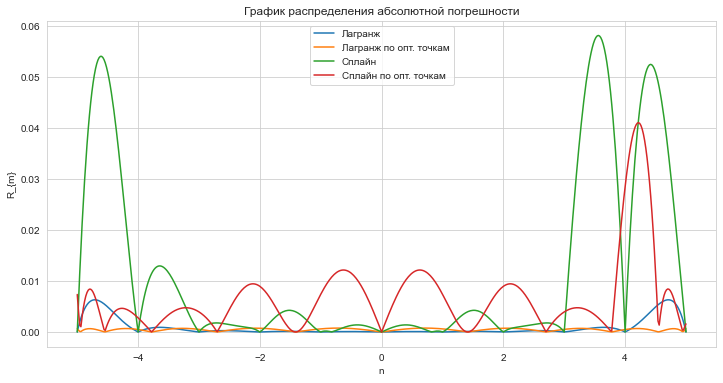

In [55]:
x = create_x(10*50,-5,5)
RL=np.array(RL)
RS=np.array(RS)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.title('График распределения абсолютной погрешности')
plt.xlabel('n')
plt.ylabel('R_{m}')
plt.plot(x,np.array(RL[2][0]))
plt.plot(x,np.array(RL[2][1]))
plt.plot(x,np.array(RS[2][0]))
plt.plot(x,np.array(RS[2][1]))
plt.legend(['Лагранж', 'Лагранж по опт. точкам','Сплайн','Сплайн по опт. точкам'])